<a href="https://colab.research.google.com/github/luissousa/GA-with-python-packtbook/blob/main/Chapter03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 03 - OneMax problem GA

Esse é o problema de algoritmo genético que basicamente é o hello world desse tipo de problema.
No caso do problema de otimização OneMax existem uma população de invíduols que possuem genes codado como zero e un´s e se procura a solucção do problema o indivíduo que tem o mais alto valor "fitness", nesse caso já se sabe a priori que o indivíduo é o que possuir todos os genes iguais a 1´s, porém é essa resposta que o algoritmo deverá nos informar usando os operadores genéticos de seleção, crossover e mutação.
Esse é um caso particular de teste para nos familiarizarmos com esses operadores e a escolha do tamanho e tipo de gene escolhido, porém a regra desse tipo de algoritmo de otimização é não sabermos qual é o valor final procurado e isso ficará a cargo da solução heurística encontrada

##Setup

In [26]:
!pip install deap

In [27]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#problem constants
ONE_MAX_LENGTH = 100 #lenght of bit string to be optimized
#Genetic algorithm constants?
POPULATION_SIZE = 200 #number of individuals in population
P_CROSSOVER = 0.9 #probability for crossover
P_MUTATION = 0.1 #probability for mutating an idividual
MAX_GENERATIONS = 50 #max number of generations for stopping condition


In [29]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [30]:
toolbox = base.Toolbox()
toolbox.register("zeroOrone",random.randint,0,1)

In [31]:
creator.create("FitnessMax",base.Fitness,weights=(1.0,))

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [32]:
creator.create("Individual",list,fitness=creator.FitnessMax)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [33]:
toolbox.register("individualCreator",tools.initRepeat,creator.Individual,toolbox.zeroOrone,ONE_MAX_LENGTH)

In [34]:
toolbox.register("populationCreator",tools.initRepeat,list,toolbox.individualCreator)

In [35]:
def oneMaxFitness(individual):
  return sum(individual), #return a tuple

In [36]:
toolbox.register("evaluate",oneMaxFitness)

In [37]:
toolbox.register("select",tools.selTournament,tournsize=3)
toolbox.register("mate",tools.cxOnePoint)
toolbox.register("mutate",tools.mutFlipBit,indpb=1.0/ONE_MAX_LENGTH)

##Envolving the solution

In [38]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
generationCounter = 0

In [39]:
fitnessValues = list(map(toolbox.evaluate,population))

In [40]:
for individual, fitnessValue in zip(population, fitnessValues):
        individual.fitness.values = fitnessValue

In [41]:
fitnessValues = [individual.fitness.values[0] for individual in population]

In [42]:
maxFitnessValues = []
meanFitnessValues = []

In [43]:
while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
        # update counter:
        generationCounter = generationCounter + 1

        # apply the selection operator, to select the next generation's individuals:
        offspring = toolbox.select(population, len(population))
        # clone the selected individuals:
        offspring = list(map(toolbox.clone, offspring))

        # apply the crossover operator to pairs of offspring:
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # calculate fitness for the individuals with no previous calculated fitness value:
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue

        # replace the current population with the offspring:
        population[:] = offspring

        # collect fitnessValues into a list, update statistics and print:
        fitnessValues = [ind.fitness.values[0] for ind in population]

        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

        # find and print best individual:
        best_index = fitnessValues.index(max(fitnessValues))
        print("Best Individual = ", *population[best_index], "\n")

- Generation 1: Max Fitness = 65.0, Avg Fitness = 53.575
Best Individual =  1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 2: Max Fitness = 66.0, Avg Fitness = 56.855
Best Individual =  1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 3: Max Fitness = 69.0, Avg Fitness = 59.42
Best Individual =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 

- Generation 4: Max Fitness = 70.0, Avg Fitness = 62.03
Best Individual =  1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 

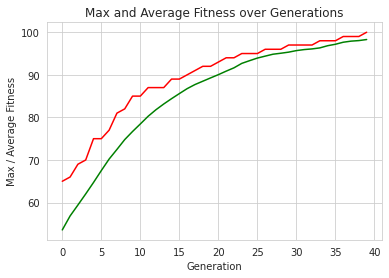

In [44]:
# Genetic Algorithm is done - plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()